# Plot how well song heuristics can be decoded from population neural response

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from disp import set_plot

PFX = 'data/simple/mlv_c/song_heurs/c_baker_song_heur_fit_song_wdw_10/c_baker_ridge_0.1'
# PFX = 'data/simple/mlv_c/song_heurs/c_baker_song_heur_fit_song_wdw_30/c_baker_ridge_0.1'

In [2]:
NRL_MDLS = ['lin', 'ln', 'dyn']
LABELS_NRL_MDL = {
    'lin': 'Linear',
    'ln': 'Lin-Nonlin',
    'dyn': 'Nonlin Adaptive'
}
TARGS = [
    'N_S_ONSETS', 'N_P_ONSETS', 'N_B_ONSETS',
    'S_TOTAL', 'P_TOTAL', 'B_TOTAL',
    'MN_S_DUR', 'MN_P_DUR', 'MN_B_DUR',
#     'SP_RATIO',
]
LABELS_TARG = {
    'N_S_ONSETS': '# S segs',
    'N_P_ONSETS': '# P segs',
    'N_B_ONSETS': '# Bouts',
    
    'S_TOTAL': 'Total S',
    'P_TOTAL': 'Total P',
    'B_TOTAL': 'Total Song',
    
    'MN_S_DUR': '<S dur>',
    'MN_P_DUR': '<P dur>',
    'MN_B_DUR': '<Bout dur>',
    
    'SP_RATIO': 'S/P'
}

r2_test_means = np.nan * np.zeros((len(NRL_MDLS), len(TARGS)))
r2_test_stds = np.nan * np.zeros((len(NRL_MDLS), len(TARGS)))
r2_test_sems = np.nan * np.zeros((len(NRL_MDLS), len(TARGS)))

for cnrl_mdl, nrl_mdl in enumerate(NRL_MDLS):
    for ctarg, targ in enumerate(TARGS):
        data = np.load(f'{PFX}_{nrl_mdl}_all_{targ.lower()}_276_tr.npy', allow_pickle=True)[0]
        r2_test_means[cnrl_mdl, ctarg] = data['r2_test'].mean()
        r2_test_stds[cnrl_mdl, ctarg] = data['r2_test'].std()
        r2_test_sems[cnrl_mdl, ctarg] = data['r2_test'].std() / np.sqrt(len(data['r2_test']))

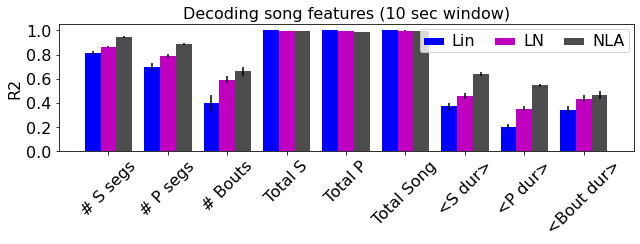

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(9, 3.5), tight_layout=True, sharey=True)

# plot decodability from models
colors = ['b', 'm', (.3, .3, .3)]
for cnrl_mdl, (nrl_mdl, c) in enumerate(zip(NRL_MDLS, colors)):
    ax.bar(
        np.arange(len(TARGS)) - .8/3 + cnrl_mdl*.8/3, r2_test_means[cnrl_mdl],
        yerr=r2_test_stds[cnrl_mdl], width=.8/3, color=c)
    
ax.set_xticks(range(len(TARGS)))
ax.set_xticklabels([LABELS_TARG[TARG] for TARG in TARGS], rotation=45)

ax.legend(['Lin', 'LN', 'NLA'], ncol=3)
set_plot(ax, y_label='R2', title='Decoding song features (10 sec window)', font_size=16)